# 제 2장. 확률분포

## 확률과 확률분포

### 사상(Event) = 사건  
* 실험이나 관측 등의 행위에 의해 생긴 결과. 주사위 던지기에서 굴려서 '나온 눈'이 사상이다.

### 확률(probability) 
* 어느 사상이 일어나기 쉬운지 수치화한 것

### 확률변수(Random variable)
* 시행한 이후에 비로소 결과를 알 수 있는 변수를 확률변수라고 한다.
* 주사위 눈과 같이 {1, 2, 3, 4, 5, 6} 에서 뽑을 수 있는 변수를 이산확률변수라고 한다.
* 키, 몸무게처럼 연속성을 띄고 있는 확률변수를 연속확률변수라고 한다.

### 확률 분포

* **이산형 분포**
  * 이항분포(Binomial)
  * 포아송분포(Poisson)
  * $\cdots$
* **연속형 분포**
  * 균일분포(Uniform)
  * 정규분포(Normal)
  * 표준정규분포(Standard Normal)
  * $X^2$분포
  * F분포
  * t분포
  * $\cdots$

### 균일분포

#### 이산균일분포(Discrete Uniform Distribution)

$$\mu = \frac{n+1}{2}, \sigma^2 = \frac{n^2-1}{12}$$

[읽을 거리](https://proofwiki.org/wiki/Variance_of_Discrete_Uniform_Distribution)


code 상에선,
```python
np.random.randint(0, 10, size=size)
```

In [0]:
%pylab inline
plt.style.use('seaborn')

Populating the interactive namespace from numpy and matplotlib


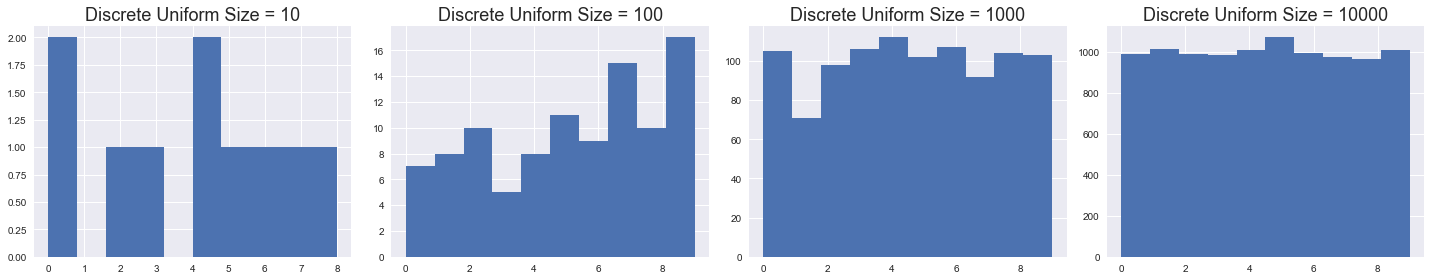

In [0]:
n = 10

sizes = [10, 100, 1000, 10000]

_, axes = subplots = plt.subplots(1, 4, figsize=(20, 4))

for idx, size in enumerate(sizes):
    x = np.random.randint(0, 10, size=size)
    axes[idx].hist(x)
    axes[idx].set_title(f'Discrete Uniform Size = {size}', size=18)
    
plt.tight_layout()

### 연속균일분포(Continuous Uniform Distribution)

$x$가 $[\alpha, \beta]$ 사이에 있을 때,

$$\mu = \frac{\alpha + \beta}{2}, \sigma^2 = \frac{(\beta - \alpha)^2}{12}$$

code 상에선,
```python
np.random.uniform(0, 10, size=size)
```

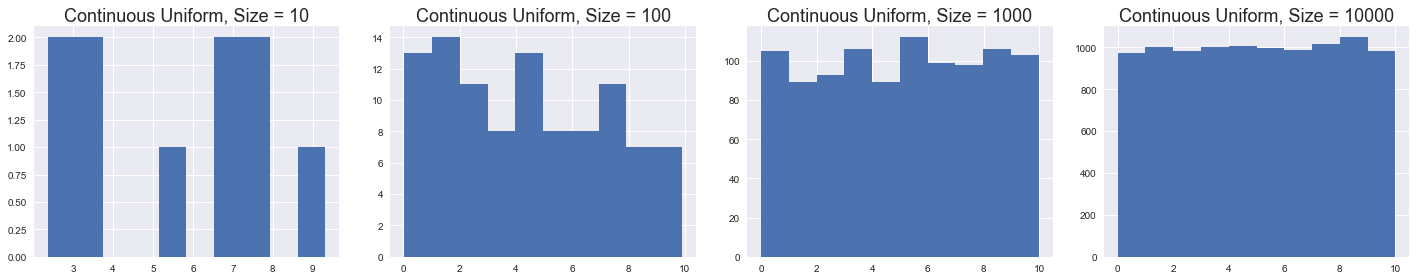

In [0]:
n = 10

sizes = [10, 100, 1000, 10000]

_, axes = subplots = plt.subplots(1, 4, figsize=(20, 4))

for idx, size in enumerate(sizes):
    x = np.random.uniform(0, 10, size=size)
    axes[idx].hist(x)
    axes[idx].set_title(f'Continuous Uniform, Size = {size}', size=18)
    
plt.tight_layout()

### 이항분포(Binomial Distribution)

* 동전 던지기의 분포
* 사상이 2개에 매핑되는 분포

$$_nC_m\cdot p^m \cdot (1 - p)^{n-m}$$

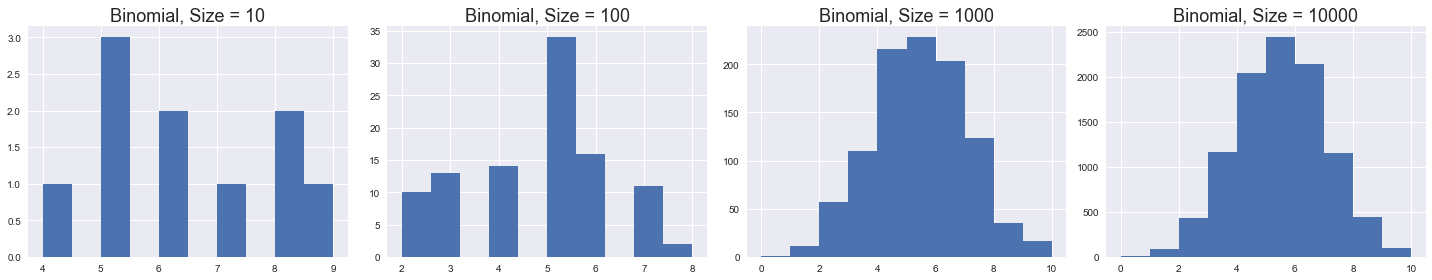

In [0]:
n, p = 10, 0.5

x = np.random.binomial(n, p, 5)

sizes = [10, 100, 1000, 10000]

_, axes = subplots = plt.subplots(1, 4, figsize=(20, 4))

for idx, size in enumerate(sizes):
    x = np.random.binomial(n, p, size=size)
    axes[idx].hist(x)
    axes[idx].set_title(f'Binomial, Size = {size}', size=18)
    
plt.tight_layout()

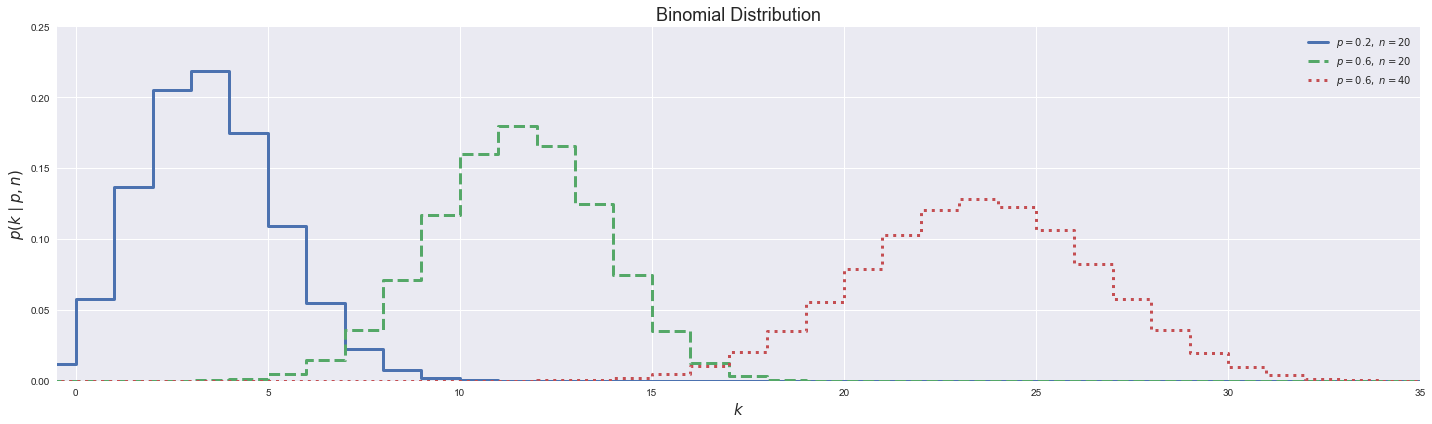

In [0]:
from scipy.stats import binom

n_values = [20, 20, 40]
p_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
k = np.arange(-1, 200)

fig, ax = plt.subplots(figsize=(20, 6))

for (n, p, style) in zip(n_values, p_values, linestyles):
    dist = binom(n, p)
    label = r'$p={:.1f},\ n={:d}$'.format(p, n)

    plt.plot(k, dist.pmf(k), ls=style, label=label, drawstyle='steps', linewidth=3)

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$k$', size=15)
plt.ylabel(r'$p(k \mid p, n)$', size=15)
plt.title('Binomial Distribution', size=18)
plt.legend()
plt.tight_layout()

### 정규분포(Normal Distribution)

* 이항분포를 보면 알 수 있듯이 시행횟수(n)이 커지면 종 모양의 분포(정규분포)가 된다.

$${\displaystyle f(x\mid \mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}}$$

* $\mu = $ 확률변수 $x$의 평균.
* $\sigma = $ 확률변수 $x$의 표준변차.
* 함수 $f$를 적분하면 확률이 나온다.

따름정리

* $\int_{-\infty}^{+\infty}f(x)dx = 1$ : 모든 확률의 합은 1이다.
* $\int_{-\infty}^{+\infty}xf(x)dx = m$ : 변량 x의 평균은 m이다.
* $\int_{-\infty}^{+\infty}(x-m)^2f(x)dx = \sigma^2$ : 변량 x의 분산은 $\sigma^2$이다.


* 왜 이항분포는 정규분포가 될까? 사실은 드무아브르라는 수학자가 이항분포가 특정분포(정규분포)로 간다는 사실을 발견한 것으로부터 시작.
* 수학자 라플라스가 이어 이항분포의 n이 충분히 클 때 이항분포가 정규분포를 따른다는 사실을 밝혀냄 $\rightarrow$ 중심극한 정리.
* 마지막으로, 가우스는 통계적 오차를 정규분포의 확률밀도함수로 표현.

[참고](http://blog.naver.com/PostView.nhn?blogId=dalsapcho&logNo=20132553174)


서울시 초등학생(총 48,000명)의 평균이 `138`이고 표준편차가 `8`인 정규분포를 따른다. 

**Q. 키가 144cm 이상 148cm 미만일 확률은 얼마일까?**

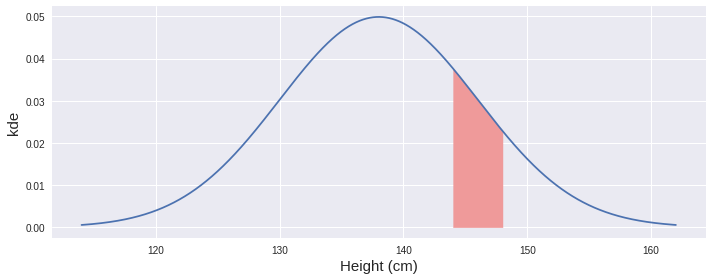

In [0]:
from scipy.stats import norm

mu = 138
sigma = 8

x_range = np.arange(mu-(3*sigma), mu+(3*sigma), .001)
normal = norm.pdf(x_range, mu, sigma)
_, ax = plt.subplots(figsize=(10, 4))
ax.plot(x_range, normal)
plt.xlabel('Height (cm)', size=15)
plt.ylabel('kde', size=15)
kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=(kde_x >= 144) & (kde_x < 148), color='#EF9A9A')
plt.tight_layout()

확률 값은 아래와 같이 근사 가능.

In [0]:
# 정규분포의 면적

sum(normal) / len(x_range) * (max(x_range) - min(x_range))

0.9972794268146618

In [0]:
# 정규분포의 면적 중 키가 144 ~ 148cm인 범위의 면적

start_cm = 144
end_cm = 148

sum(normal[(kde_x >= start_cm) & (kde_x < end_cm)]) / len(x_range) * (end_cm - start_cm)

0.010082082018851813

그러므로, 서울시 초등학생의 키가 `144cm` ~ `148cm` 사이일 확률은 `10%`이다.

### 표준정규분포(Standard Normal Deviation)

* $Z_i$는 표준화 변량. 아래 식으로 표준화한다.
* 표준정규분포 대신 Z-분포라고도 부른다.

$$Z_i = \frac{x_i - \mu}{\sigma}$$

|                 No | 원래 데이터($x_i$) | 편차($x_i - \bar{x}$) | 표준화변량($Z_i$)       |
|:-------------------:|-------------------:|---------------------:|------------------:|
|                  1 |                -10 |                 -5.2 |             -1.05 |
|                  2 |                 -8 |                 -3.2 |             -0.65 |
|                  3 |                 -7 |                 -2.2 |             -0.44 |
|                  4 |                 -3 |                  1.8 |              0.36 |
|                  5 |                  4 |                  8.8 |              1.78 |
|        **평균($\mu$)** |                **-4.8** |                  **0.0** |              **0.00** |
| **표준편차($\sigma$)** |                 **4.96** |                 **4.96** |              **1.00** |

In [0]:
origin_values = [-10, -8, -7, -3, 4]

mu = np.mean(origin_values)
sigma = np.std(origin_values)

print(f'mu: {mu:.2f}, sigma: {sigma:.2f}')

mu: -4.80, sigma: 4.96


In [0]:
z_score = lambda x, mu, sigma: (x - mu) / sigma
z_values = [z_score(x, mu, sigma) for x in origin_values]

In [0]:
z_values

[-1.04927460595264,
 -0.6457074498170093,
 -0.44392387174919395,
 0.3632104405220677,
 1.7756954869967758]

In [0]:
z_mu = np.mean(z_values)
z_sigma = np.std(z_values)

print(f'mu: {z_mu:.2f}, sigma: {z_sigma:.2f}')

mu: 0.00, sigma: 1.00


In [0]:
from scipy.stats import zscore

zscore(origin_values)

array([-1.04927461, -0.64570745, -0.44392387,  0.36321044,  1.77569549])

**Q. 서연은 $\mu$가 `30`이고, $\sigma$가 `8`인 수학시험에서 `50`점을 받았다.
선우는 $\mu$가 `80`이고 $\sigma$가 `6`인 영어 시험에서 `90`점을 받았다. 둘 중 누가 더 좋은 성적이라고 볼 수 있을까?
**

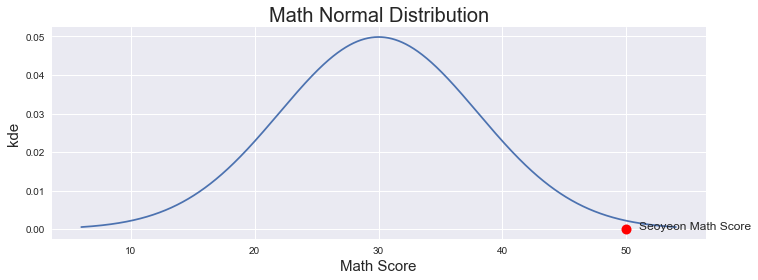

In [0]:
math_mu = 30
math_sigma = 8
seoyeon_score = 50

_, ax = plt.subplots(figsize=(10, 4))
math_range = np.arange(math_mu-(3*math_sigma), math_mu+(3*math_sigma), .001)
math_norm = norm.pdf(math_range, math_mu, math_sigma)
ax.plot(math_range, math_norm)
plt.xlabel('Math Score', size=15)
plt.ylabel('kde', size=15)
plt.title('Math Normal Distribution', size=20)

ax.plot(seoyeon_score, 0, 'ro', ms=10)
ax.annotate('Seoyeon Math Score', (seoyeon_score - 10, 0.01), xytext=(seoyeon_score + 1, 0), size=12)

plt.tight_layout()

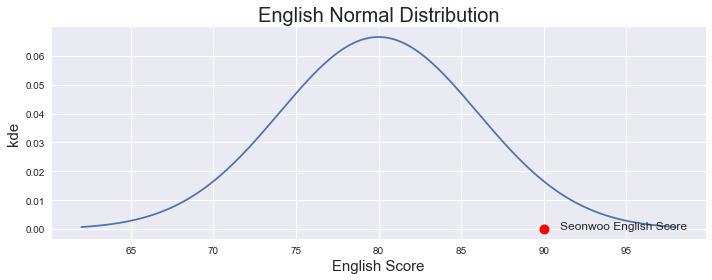

In [0]:
english_mu = 80
english_sigma = 6
seonwoo_score = 90

_, ax = plt.subplots(figsize=(10, 4))
english_range = np.arange(english_mu-(3*english_sigma), english_mu+(3*english_sigma), .001)
english_norm = norm.pdf(english_range, english_mu, english_sigma)
ax.plot(english_range , english_norm)
plt.xlabel('English Score', size=15)
plt.ylabel('kde', size=15)
plt.title('English Normal Distribution', size=20)

ax.plot(seonwoo_score, 0, 'ro', ms=10)
ax.annotate('Seonwoo English Score', (seonwoo_score - 10, 0.01), xytext=(seonwoo_score + 1, 0), size=12)

plt.tight_layout()

### 시그마 구간

* 표준화(nomalization)을 하게 되면 $\sigma$를 통해 대략적인 위치를 알 수 있다.
* 만약 데이터가 3$\sigma$밖에 있다면 그 데이터는 정규분포에서는 일어나지 않는 값이다(해석: 정규분포 안의 확률을 1로 가정했을 때 1을 넘어서는 사상이므로, 정규분포에서는 발생할 수 없다).

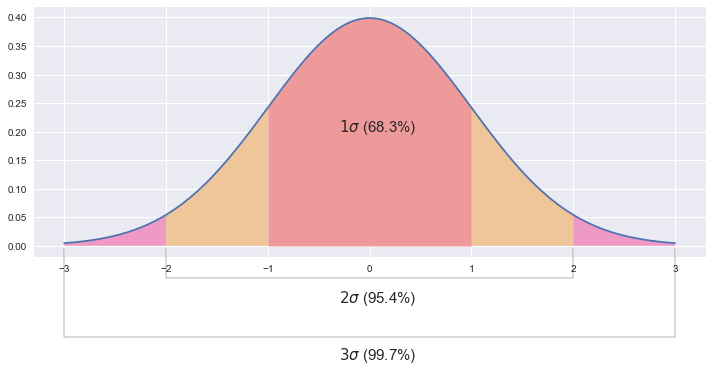

In [0]:
mu = 0
sigma = 1

_, ax = plt.subplots(figsize=(10, 4))
x = np.arange(mu - (3*sigma), mu + (3*sigma), .001)
normal = norm.pdf(x, mu, sigma)
ax.plot(x , normal)

kde_x, kde_y = ax.lines[0].get_data()
ax.fill_between(kde_x, kde_y, where=(kde_x >= -1) & (kde_x <= 1), color='#EF9A9A')
ax.fill_between(kde_x, kde_y, where=((kde_x >= -2) & (kde_x < -1)) | ((kde_x > 1) & (kde_x <= 2)), color='#EFC59A')
ax.fill_between(kde_x, kde_y, where=(kde_x < -2) | (kde_x > 2), color='#EF9AC5')

ax.annotate(r'$1\sigma$ (68.3%)', (0, 0), xytext=(-0.3, 0.2), size=15)
ax.annotate(r'$2\sigma$ (95.4%)', (0, 0), xytext=(-0.3, -0.1), size=15)

ann = ax.annotate('', xy=(-2, 0), xycoords='data',
                  xytext=(2, 0), textcoords='data',
                  arrowprops=dict(arrowstyle="-",
                                  connectionstyle="bar,fraction=-0.08",
                                  ec="k",))


ax.annotate(r'$3\sigma$ (99.7%)', (0, 0), xytext=(-0.3, -0.2), size=15)
ann = ax.annotate('', xy=(-3, 0), xycoords='data',
                  xytext=(3, 0), textcoords='data',
                  arrowprops=dict(arrowstyle="-",
                                  connectionstyle="bar,fraction=-0.15",
                                  ec="k",))
plt.tight_layout()

### 왜도와 첨도

#### 왜도(Skewness)
* 분포가 좌우로 치우친 정도를 나타내는 지표.
* 왜도가 양의 값일때는 꼬리가 오른쪽으로 길어지고, 음의 값일때는 꼬리가 왼쪽으로 길어진다.
* $n$은 데이터 크기, $\bar{x}$는 평균, $s$는 표준편차

$$S_w = \frac{1}{n} \sum_{i=1}^{n}(\frac{x_i - \bar{x}}{s})^3$$

In [0]:
from scipy.stats import skewnorm

**NOTE**

`scipy`의 `skewnorm`은 정규분포의 pdf와 cdf의 합으로 만들어졌음.

```python
skewnorm.pdf(x, a) = 2 * norm.pdf(x) * norm.cdf(a*x)
```

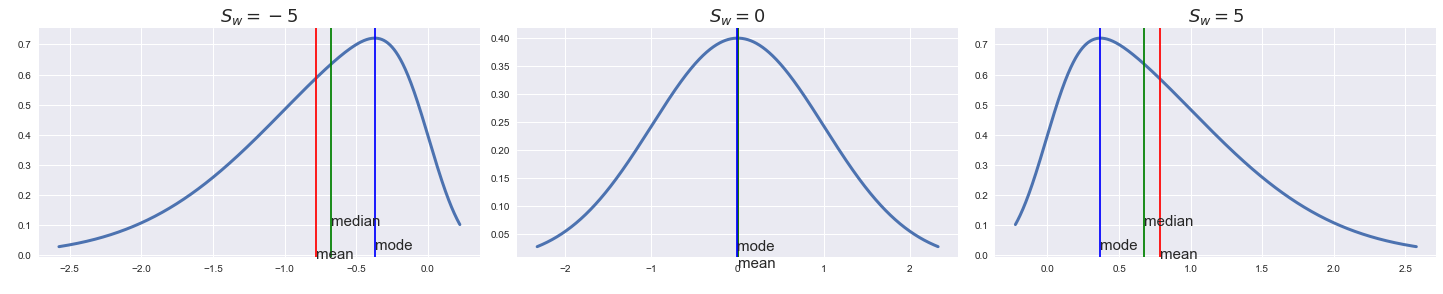

In [0]:
skew_test = [-5, 0, 5]

_, axes = plt.subplots(ncols=3, figsize=(20, 4))

for ax, s in zip(axes, skew_test):
    mean = skewnorm.mean(s)
    median = skewnorm.median(s)
    
    x = np.linspace(skewnorm.ppf(0.01, s), skewnorm.ppf(0.99, s), 1000)
    ax.plot(x, skewnorm.pdf(x, s), '-', lw=3)
    ax.set_title(rf'$S_w = {s}$', size=18)

    kde_x, kde_y = ax.lines[0].get_data()
    mode = kde_x[kde_y == kde_y.max()][0]

    ax.axvline(x=mean, color='r')
    ax.annotate('mean', (mean, 0.1), xytext=(mean, -0.01), textcoords='data', size=15)
    ax.axvline(x=median, color='g')
    ax.annotate('median', (median, 0.), xytext=(median, 0.1), textcoords='data', size=15)
    ax.axvline(x=mode, color='b')
    ax.annotate('mode', (mode, 0.1), xytext=(mode, 0.02), textcoords='data', size=15)
    
plt.tight_layout()

In [0]:
print(f's = {s}')
data = skewnorm.pdf(x, s)

s = 5


In [0]:
skewness = lambda data, mean, std: sum([((x - mean) / std) ** 3 for x in data]) / len(data)

In [0]:
skewness(data, np.mean(data), np.std(data))

0.2013782875844429

In [0]:
from scipy.stats import skew
skew(data)

0.20137828758444284

#### 첨도(Kurtosis)

* 정규분포와 비교했을 때, 분포곡선에서 정점이 뾰족한 정도.
* $S_k < 0$: 분산이 커지고, 그래프가 완만해짐
* $S_k = 0$: 정규분포
* $S_k > 0$ 분산이 작아지고, 그래프가 뾰족해짐.

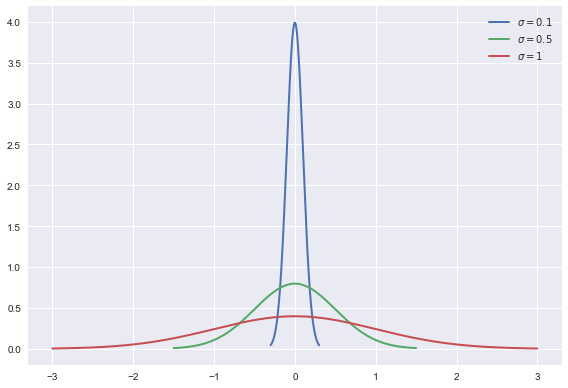

In [0]:
kurt_test = [0.1, 0.5, 1]

# _, axes = plt.subplots(ncols=3, figsize=(20, 4))

for sigma in kurt_test:
    x = np.arange(mu - (3*sigma), mu + (3*sigma), .001)
    normal = norm.pdf(x, mu, sigma)
    plt.plot(x, normal, '-', lw=2, label=rf'$\sigma = {sigma}$')
    
plt.legend()
plt.tight_layout()

In [0]:
get_kurtosis = lambda data, mean, std: sum([((x - mean) / std) ** 4 for x in data]) / len(data) - 3

In [0]:
get_kurtosis(data, np.mean(data), np.std(data))

-1.3944722329832657

In [0]:
from scipy.stats import kurtosis
kurtosis(data)

-1.394472232983266

### 포아송 분포

* 시행횟수는 많지만 사상(event)는 드물게 발생하는 이항분포
* 한달동안 생산한 물건 중 불량품의 수, 어느 횡단보도에서 교통사고가 일어나는 수 등 드물게 일어나는 사항의 확률분포 계산 시 사용
* $\lambda$: 평균값(시행횟수 * 확률)
* $x$: 사상이 일어나는 횟수
$$f(X) = \frac{e^{-\lambda}\lambda^x}{x!}$$

In [0]:
n = 1000
p = 0.002

lambda_value = n * p
print(lambda_value)

2.0


In [0]:
poi = lambda x, l: ((np.e ** -l) * (l ** x)) / np.prod([i for i in range(x, 0, -1)])

In [0]:
poi(0, n * p)

0.1353352832366127

In [0]:
from scipy.stats import poisson

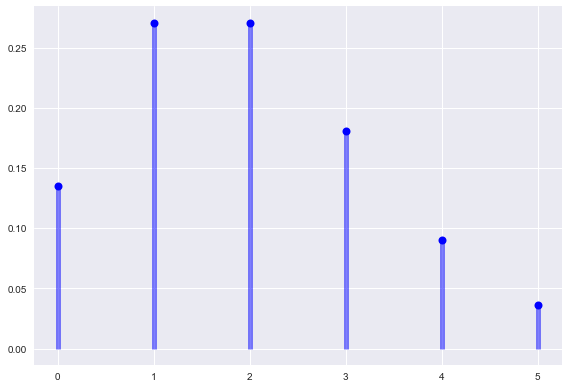

In [0]:
_, ax = plt.subplots(1, 1)

# mu = lambda
mu = 2

x = np.arange(poisson.ppf(0.01, mu),
              poisson.ppf(0.99, mu))
ax.plot(x, poisson.pmf(x, mu), 'bo', ms=8, label='poisson pmf')
ax.vlines(x, 0, poisson.pmf(x, mu), colors='b', lw=5, alpha=0.5)
plt.tight_layout()

`lambda`값이 커질수록 점점 정규분포에 가까워진다. $\rightarrow$ `n`이나 `p`가 커질수록 정규분포가 된다.

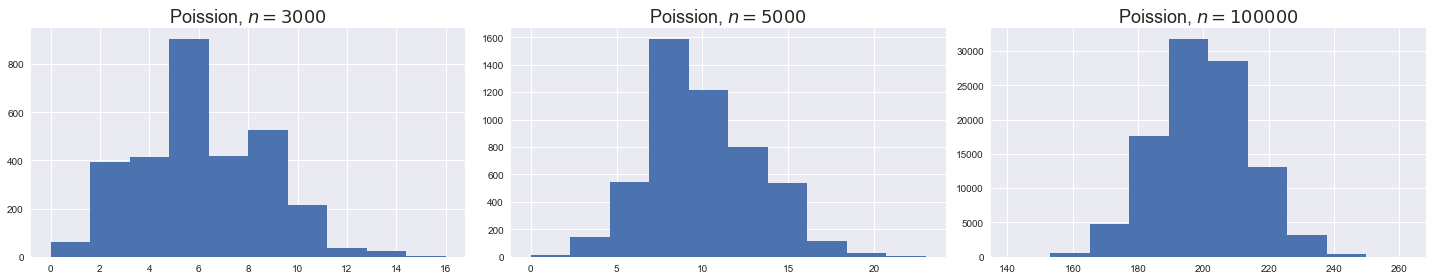

In [0]:
n_list = [3000, 5000, 100000]
p = 0.002
_, axes = subplots = plt.subplots(1, 3, figsize=(20, 4))

for n, ax in zip(n_list, axes):
    x = poisson.rvs(n * p, size=n)
    ax.hist(x)
    ax.set_title(rf'Poission, $n = {n}$', size=18)
    
plt.tight_layout()

**Q. 왜 n이 커질수록 정규분포가 될까?**

- 포아송도 이항분포의 일종이기 때문.

### $\chi^2$분포(카이제곱분포)

* 분석에 쓰이는 데이터는 일변량이 아니다.
* 따라서 다변량 분석을 위한 분포가 필요 $\rightarrow$ 카이제곱분포.
* 카이제곱분포에서는 기대값=자유도, 분산 = 2 * 자유도 와 같다.
* 이와 같은 이유에서 자유도가 늘어나면 $\chi^2$ 그래프가 오른쪽으로 평평해지는 것이다.
* 변수 $x_i$의 평균을 $\mu_i$, 표준편차를 $\sigma_i$라고 할때,

$$\chi^2_{(m)} = (\frac{x_1 - \mu_1}{\sigma_1})^2 + (\frac{x_2 - \mu_2}{\sigma_2})^2 + \cdots + (\frac{x_m - \mu_m}{\sigma_m})^2$$

* 단 평균과 분산이 원래 정규분포와 같을 때에는,

$$\chi^2_{(m)} = (\frac{x_1 - \mu}{\sigma})^2 + (\frac{x_2 - \mu}{\sigma})^2 + \cdots + (\frac{x_m - \mu}{\sigma})^2 = \frac{1}{\sigma^2}{\sum_{i=1}^{m}(x_i - \mu)^2}$$

* 뒤에서 다시 나오겠지만, 카이제곱분포는 독립성, 적합도 검정에서 자주 사용되는 분포이다.


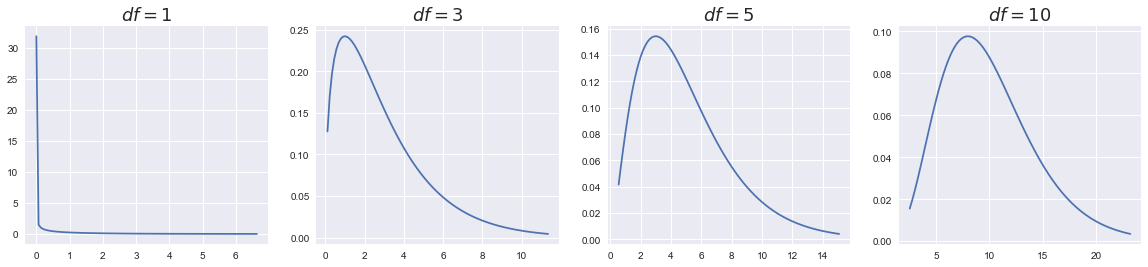

In [0]:
from scipy.stats import chi2

df_list = [1, 3, 5, 10]

_, axes = plt.subplots(1, 4, figsize=(20, 4))
for df, ax in zip(df_list, axes):
    x = np.linspace(chi2.ppf(0.01, df), chi2.ppf(0.99, df), 100)
    ax.plot(x, chi2.pdf(x, df))
    ax.set_title(rf'$df = {df}$', size=18)

* 자유도는 3챕터에서 좀 더 자세히 다룬다.

### F분포

* $F$값은 $\chi^2$값의 비로 정의된다. 그리고 그 분포가 F분포이다.

$$F = \frac{\frac{{\chi^2}_1}{df_1}}{\frac{{\chi^2}_2}{df_2}}$$

$$\mu = \frac{m_2}{m_2 - 2}, \sigma^2 = \frac{2m_2^2(m_1 + m_2 - 2)}{m_1(m_2 - 2)^2(m_2 - 4)}$$

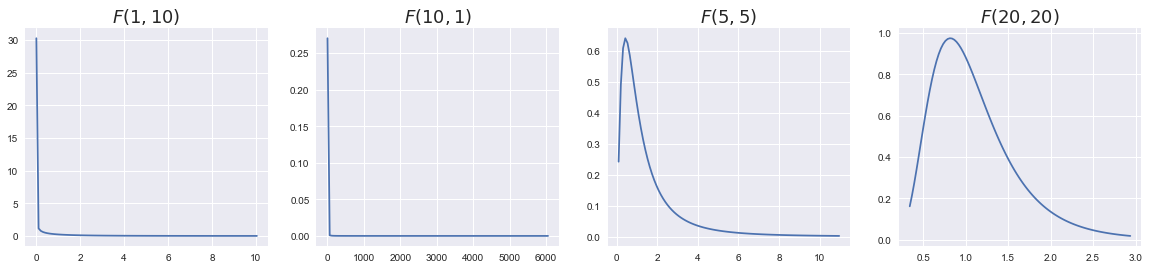

In [0]:
from scipy.stats import f

m1_list = [1, 10, 5, 20]
m2_list = [10, 1, 5, 20]

fig, axes = plt.subplots(1, 4, figsize=(20, 4))

for ax, (m1, m2) in zip(axes, zip(m1_list, m2_list)):
    x = np.linspace(f.ppf(0.01, m1, m2), f.ppf(0.99, m1, m2), 100)
    ax.plot(x, f.pdf(x, m1, m2))
    ax.set_title(rf'$F({m1}, {m2})$', size=18)

### t분포

* 모분산을 알수 없고 표본크기가 작을 때 정규분포 대신 사용한다.
* 표본크기가 작을 때 정규분포에 비해 양쪽 꼬리가 두꺼워지지만 정규분포와 거의 일치한다.
* $\mu = 0$, $\sigma = \frac{m}{m-2}$

$\bar{x}$의 표준화 변량이 아래와 같았다면,
$$Z_{\bar{x}} = \frac{\bar{x} - \mu}{\frac{\sigma}{\sqrt{n}}}$$

$\bar{x}$의 스튜던트화 변량은,
$$T_{\bar{x}} = \frac{\bar{x} - \mu}{\frac{S}{\sqrt{n-1}}}$$

으로 변경해 계산한다($s$는 표본 표준편차).

### 확률분포 간의 관계

확률분포가 서로 다르다고 생각되기 쉽지만,

1. 이항분포에서 n이 크고 p가 작은 경우 포아송분포이다.
2. 이항분포가 n이 크면 정규분포이다.
3. 정규분포를 표준화(Z score)하면 표준정규분포이다.
4. 표준정규분포보다 n이 작고 모분산을 알수 없어 스튜던트화시키면 t분포이다.
5. 표준정규분포의 제곱의 합은 $\chi^2$분포이다.
6. $\chi^2$분포의 비는 F분포이다.
7. t분포를 제곱하면 F분포이다(단, F분포의 분자 자유도가 1인 경우에 한해)
8. $\chi^2$분포의 자유도가 크면 정규분포가 된다.